In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# 1) Load the dataset
iris = load_iris(as_frame=True)

In [5]:
# 2) Explore the keys, features and targets
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
# 3) Print shape of the dataset (150 instances and 4 features)
print(iris.data.shape)

(150, 4)


In [10]:
# 4) Turn dataset into a panda frame with the targets
iris_df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_df['Iris type'] = iris['target']
iris_df.head(-20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
125,7.2,3.2,6.0,1.8,2
126,6.2,2.8,4.8,1.8,2
127,6.1,3.0,4.9,1.8,2
128,6.4,2.8,5.6,2.1,2


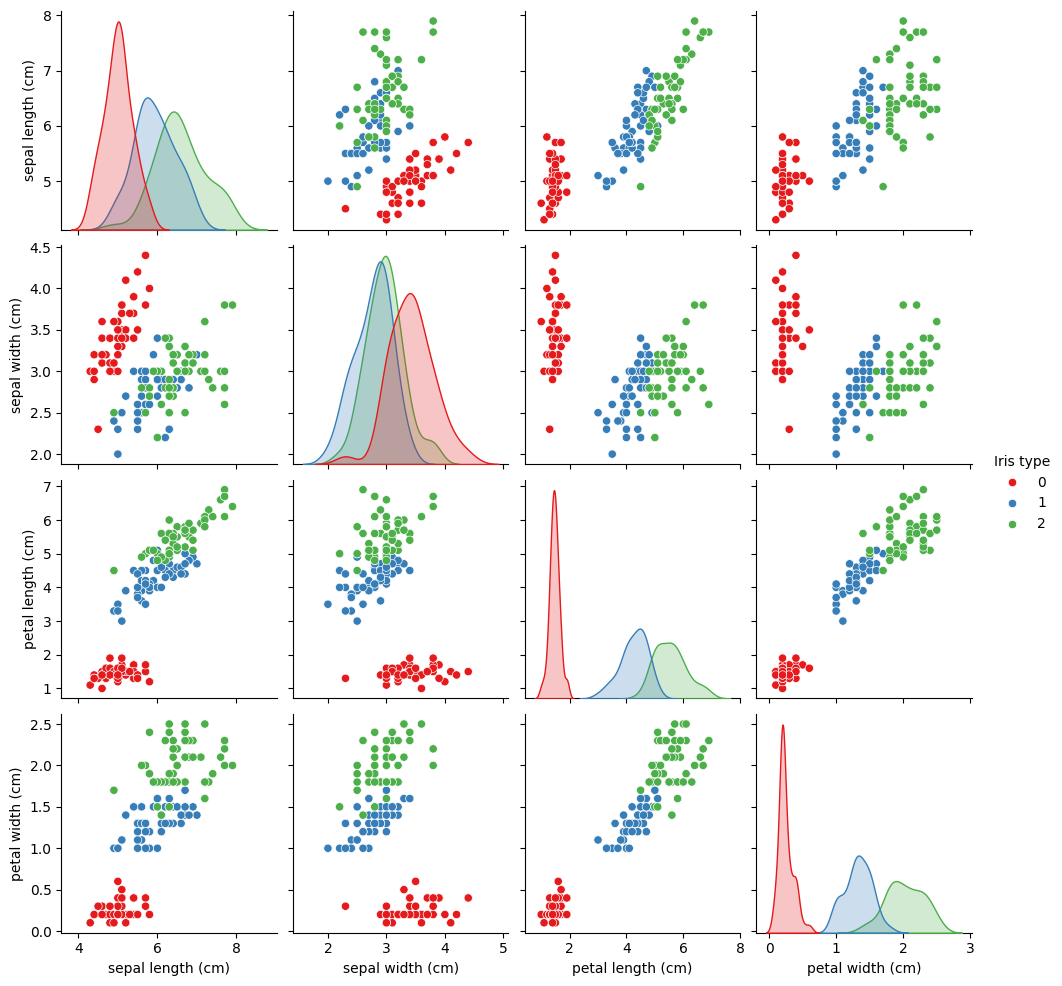

In [11]:
# 5) Visualise the data
sns.pairplot(iris_df, hue = 'Iris type', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette = 'Set1')



In [12]:
# 6) Split data into train and test sets
# Split the data into features (X) and target (y)
X = iris_df.drop('Iris type', axis=1)
y = iris_df['Iris type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Text(0, 0.5, 'Accuracy')

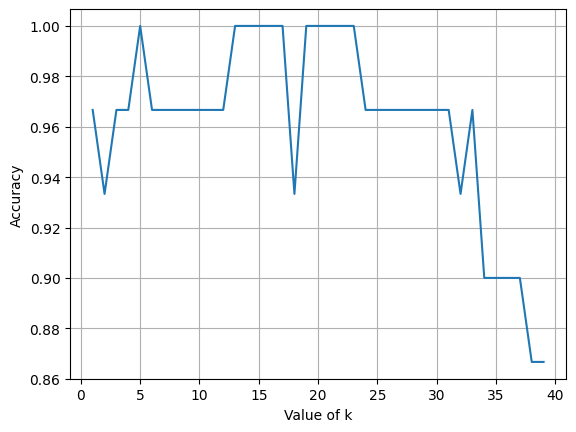

In [13]:
# 7) Tuning k (n_neighbors)
k_range = range(1, 40)
scores = {}
list_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    list_scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, list_scores)
plt.grid()
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

In [15]:
# 8) Training the final model
knn = KNeighborsClassifier(n_neighbors=9, p=2, metric='minkowski')
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=9)

In [16]:
# 9) Making new predictions
classes = {0:'setosa_0', 1:'verticolor_1', 2:'virginica_2'}
x_new = [[7.5, 2.5, 4, 1.5],
         [4, 3, 2, 0.5]]
y_predict = knn.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

verticolor_1
setosa_0


/Users/jingfeng/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


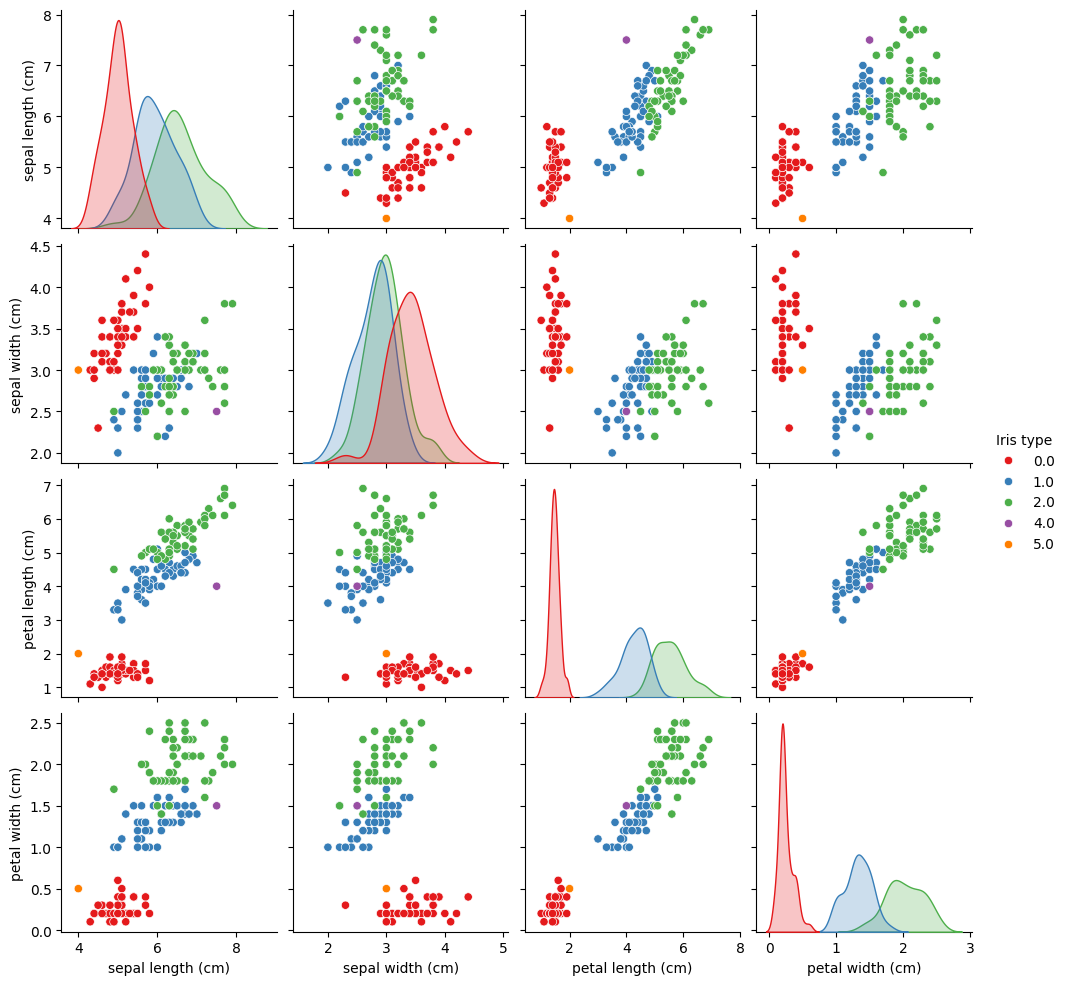

In [17]:
iris_df.loc[len(iris_df)] = [7.5, 2.5, 4, 1.5, 4]
iris_df.loc[len(iris_df)] = [4, 3, 2, 0.5, 5]
sns.pairplot(iris_df, hue = 'Iris type', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette = 'Set1')